# 1. K-Means Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans  
import cv2
from sklearn.mixture import GaussianMixture
from collections import Counter
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score

In [3]:
warnings.filterwarnings ('ignore')
pd.set_option ('display.width', None)
pd.set_option ('display.max_rows', 100)
pd.set_option ('display.max_columns', 50)

## Assignment 1 (4 scores)

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of intializing centroids randomly to the overall performance of K-means.

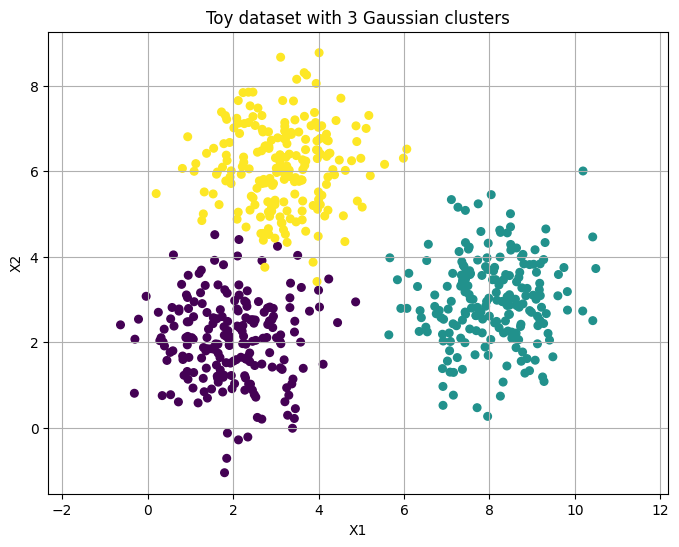

In [4]:
n_points = 200

# Ma trận hiệp phương sai
Sigma = np.array([[1, 0], [0, 1]]) 

mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

data1 = np.random.multivariate_normal(mean1, Sigma, n_points)
data2 = np.random.multivariate_normal(mean2, Sigma, n_points)
data3 = np.random.multivariate_normal(mean3, Sigma, n_points)

# Ghép dữ liệu
X = np.vstack([data1, data2, data3])

# Gán nhãn cho từng cụm
y = np.array([0]*n_points + [1]*n_points + [2]*n_points)

# Vẽ dữ liệu
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Toy dataset with 3 Gaussian clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis ('equal')
plt.grid(True)
plt.show()

In [5]:
class KMeans_ ():
    def __init__ (self, n_clusters=3, max_iter=100, tol=1e-4, random_state=0):
        ''''''
        self.n_clusters = n_clusters
        self.max_iter_ = max_iter
        self.tol = tol                      # Sai số cho phép để dừng
        self.random_state = random_state
        self.cluster_centers_ = None
        self.inertia_ = None                # Tổng sai số
        self.labels_ = None                 # Nhãn
        self.n_iter_ = 0                    # Số vòng lặp thực tế
        
    def fit (self, X: np.ndarray) -> np.ndarray:
        ''''''
        np.random.seed (self.random_state)
        random_idx = np.random.permutation (X.shape [0]) [:self.n_clusters]
        self.cluster_centers_ = X[random_idx]
        
        for i in range (self.max_iter_):
            distances = self._compute_distances_ (X)
            # E-step
            labels = np.argmin (distances, axis=1)
            
            # Update centroids
            new_centroids = []
            for j in range (self.n_clusters):
                cluster_points = X[labels == j]
                # Tính trung bình tất cả các điểm thuộc về điểm đó
                if (len (cluster_points) > 0):
                    centroid = cluster_points.mean (axis=0)
                else:
                    centroid = self.cluster_centers_[j]
                
                new_centroids.append (centroid)
                
            new_centroids = np.array (new_centroids)
            shift = np.sum ((new_centroids - self.cluster_centers_) ** 2)
            if shift <= self.tol:
                break
            self.cluster_centers_ = new_centroids
            self.n_iter_ += 1
            
        self.labels_ = labels
        self.inertia_ = np.sum ((X - self.cluster_centers_[labels]) ** 2)
        
    def predict (self, X: np.ndarray):
        distances = self._compute_distances_ (X)
        return np.argmin (distances, axis=1)
    
    def _compute_distances_ (self, X: np.ndarray) -> np.ndarray:
        return np.linalg.norm (X[:, np.newaxis] - self.cluster_centers_, axis=2)

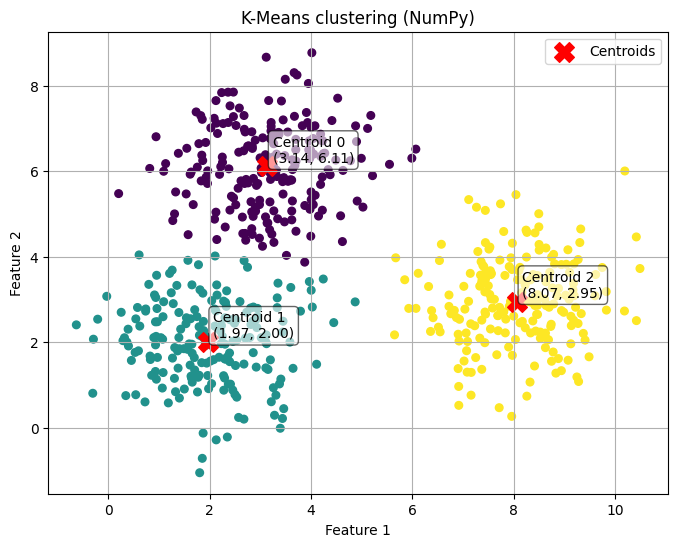

Toạ độ centroids:
[[3.13811844 6.11472299]
 [1.9656324  2.00302743]
 [8.06648124 2.95413908]]


In [6]:
# Run KMeans
kmeans = KMeans_(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

# Add coordinate annotations for centroids
for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (NumPy)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
print ('Toạ độ centroids:')
print (kmeans.cluster_centers_)

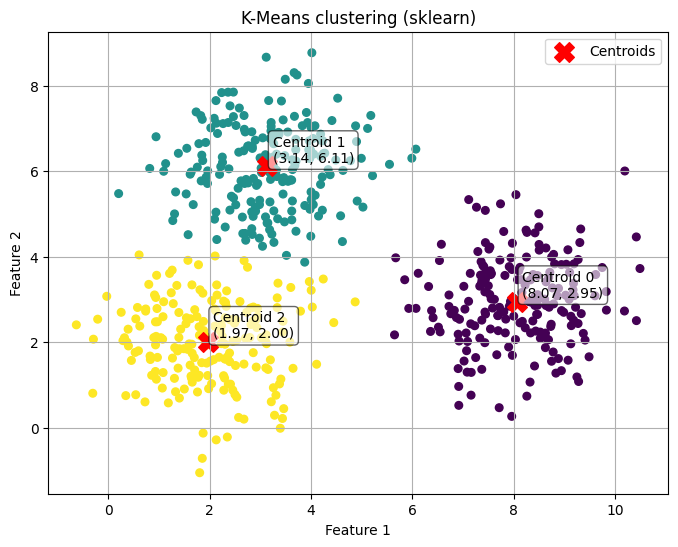

Toạ độ centroids:
[[8.06648124 2.95413908]
 [3.13811844 6.11472299]
 [1.9656324  2.00302743]]


In [7]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (sklearn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
print ('Toạ độ centroids:')
print (kmeans.cluster_centers_)

In [8]:
print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Normalized Mutual Info:", normalized_mutual_info_score(y, kmeans.labels_))
print("Homogeneity:", homogeneity_score(y, kmeans.labels_))
print("Completeness:", completeness_score(y, kmeans.labels_))
print("V-Measure:", v_measure_score(y, kmeans.labels_))

Adjusted Rand Index: 0.9703515041329707
Normalized Mutual Info: 0.9532461731380942
Homogeneity: 0.9532317115294047
Completeness: 0.9532606351855886
V-Measure: 0.9532461731380942


`Random initialization of centroids in K-Means can lead to poor clustering, slower convergence, and inconsistent results.`

## Assignment 2 (4 scores)
- Generate a toy dataset having $50$ points following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma)$, $20$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma)$, and $1000$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma)$ where $\Sigma = 
\left(\begin{array}{cc}
    1 & 0 \\
    0 & 1
\end{array}\right)
$.
- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of different sizes among clusters to the performance of K-means.

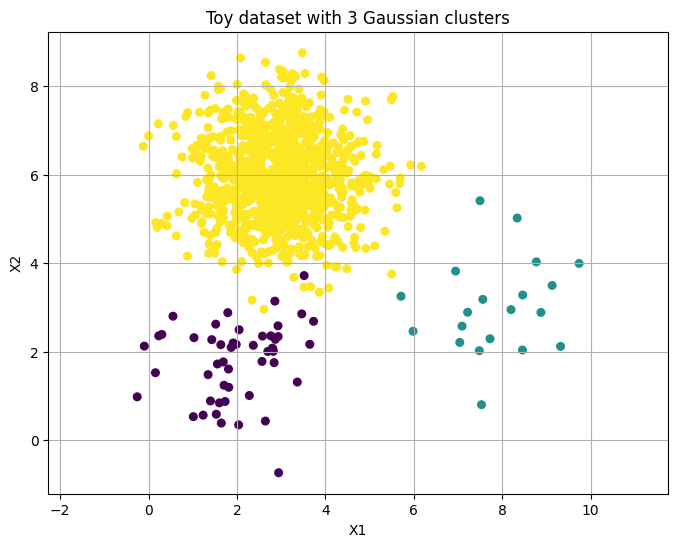

Toạ độ centroids:
[[8.06648124 2.95413908]
 [3.13811844 6.11472299]
 [1.9656324  2.00302743]]


In [9]:
n1_points = 50
n2_points = 20
n3_points = 1000

Sigma = np.array([[1, 0], [0, 1]]) 

mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

data1 = np.random.multivariate_normal(mean1, Sigma, n1_points)
data2 = np.random.multivariate_normal(mean2, Sigma, n2_points)
data3 = np.random.multivariate_normal(mean3, Sigma, n3_points)

X = np.vstack([data1, data2, data3])

y = np.array([0]*n1_points + [1]*n2_points + [2]*n3_points)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Toy dataset with 3 Gaussian clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis ('equal')
plt.grid(True)
plt.show()
print ('Toạ độ centroids:')
print (kmeans.cluster_centers_)

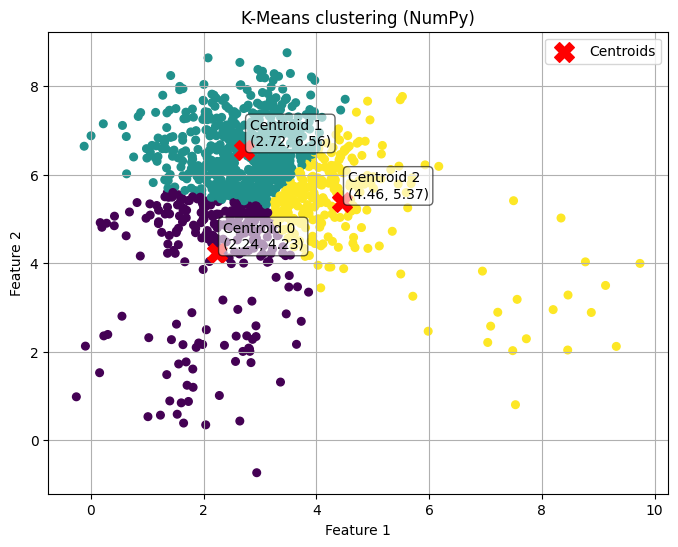

Toạ độ centroids:
[[2.24051271 4.22950637]
 [2.71909369 6.55976186]
 [4.45554809 5.37339256]]


In [10]:
kmeans = KMeans_(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (NumPy)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
print ('Toạ độ centroids:')
print (kmeans.cluster_centers_)

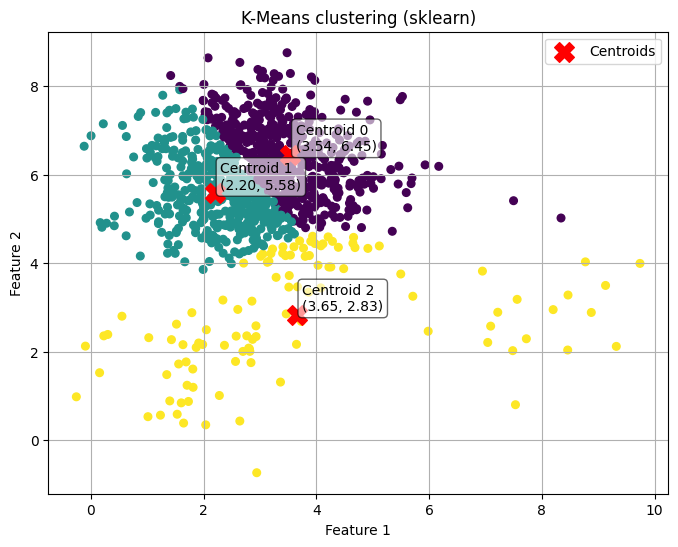

Toạ độ centroids:
[[3.53601761 6.44941737]
 [2.19820243 5.57564151]
 [3.64924851 2.82767971]]


In [11]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (sklearn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
print ('Toạ độ centroids:')
print (kmeans.cluster_centers_)

In [12]:
print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Normalized Mutual Info:", normalized_mutual_info_score(y, kmeans.labels_))
print("Homogeneity:", homogeneity_score(y, kmeans.labels_))
print("Completeness:", completeness_score(y, kmeans.labels_))
print("V-Measure:", v_measure_score(y, kmeans.labels_))

Adjusted Rand Index: 0.15587486287165803
Normalized Mutual Info: 0.2680063955001266
Homogeneity: 0.5850433202675963
Completeness: 0.17381530339382353
V-Measure: 0.2680063955001266


`K-Means is sensitive to differences in cluster size.`

## Assignment 3 (2 scores)

- Generate a toy dataset having $600$ data points, $200$ points of them following the Gaussian distribution $\mathcal{N}((2, 2), \Sigma_1)$, $200$ points of them following the Gaussian distribution $\mathcal{N}((8, 3), \Sigma_1)$, and $200$ points of them following the Gaussian distribution $\mathcal{N}((3, 6), \Sigma_2)$ where 

$$
    \Sigma_1 = 
    \left(\begin{array}{cc}
        1 & 0 \\
        0 & 1
    \end{array}\right)
$$ 

and

$$
\Sigma_2 = 
    \left(\begin{array}{cc}
        10 & 0 \\
        0 & 1
    \end{array}\right)
$$.

- Use Numpy only to implement the K-means method for finding three clusters from the toy dataset.
- Train this K-means with EM method.
- Give comments on the effect of distribution $\mathcal{N}((3, 6), \Sigma_2)$ to the performance of K-means.

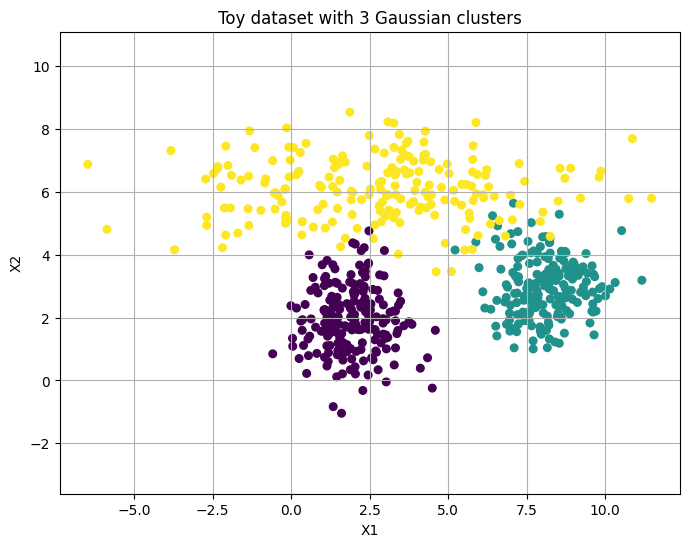

In [13]:
n_points = 200

Sigma1 = np.array([[1, 0], [0, 1]])  
Sigma2 = np.array([[10, 0], [0, 1]])

mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

data1 = np.random.multivariate_normal(mean1, Sigma1, n_points)
data2 = np.random.multivariate_normal(mean2, Sigma1, n_points)
data3 = np.random.multivariate_normal(mean3, Sigma2, n_points)

X = np.vstack([data1, data2, data3])

y = np.array([0]*n_points + [1]*n_points + [2]*n_points)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.title("Toy dataset with 3 Gaussian clusters")
plt.xlabel("X1")
plt.ylabel("X2")
plt.axis ('equal')
plt.grid(True)
plt.show()


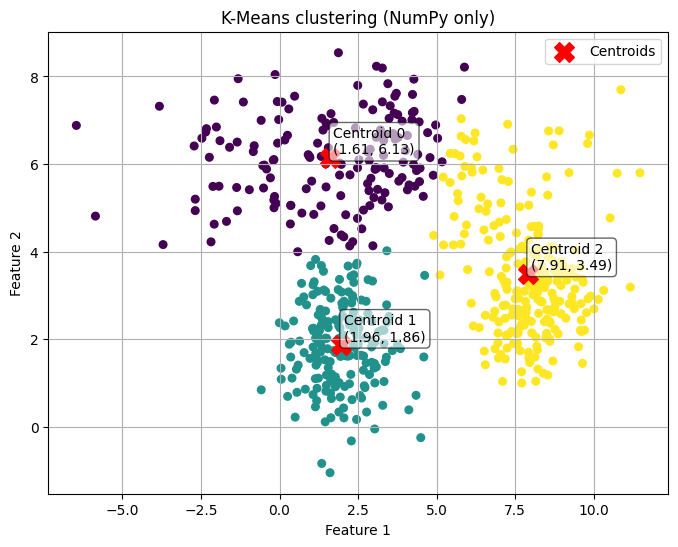

Toạ độ centroids:
[[1.61326726 6.13187608]
 [1.95551621 1.86230012]
 [7.90758698 3.49266261]]


In [14]:
kmeans = KMeans_(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (NumPy only)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
print ('Toạ độ centroids:')
print (kmeans.cluster_centers_)

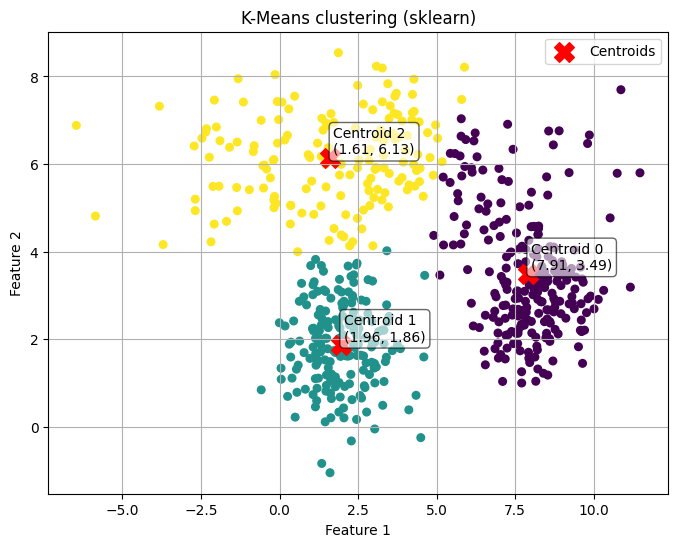

Toạ độ centroids:
[[7.90758698 3.49266261]
 [1.95551621 1.86230012]
 [1.61326726 6.13187608]]


In [15]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

for i, (x, z) in enumerate(kmeans.cluster_centers_):
    plt.text(x + 0.1, z + 0.1, f'Centroid {i}\n({x:.2f}, {z:.2f})', 
             fontsize=10, color='black', bbox=dict(boxstyle='round,pad=0.3', fc='white', ec='black', alpha=0.6))

plt.title("K-Means clustering (sklearn)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()
print ('Toạ độ centroids:')
print (kmeans.cluster_centers_)

In [16]:
print("Adjusted Rand Index:", adjusted_rand_score(y, kmeans.labels_))
print("Normalized Mutual Info:", normalized_mutual_info_score(y, kmeans.labels_))
print("Homogeneity:", homogeneity_score(y, kmeans.labels_))
print("Completeness:", completeness_score(y, kmeans.labels_))
print("V-Measure:", v_measure_score(y, kmeans.labels_))

Adjusted Rand Index: 0.7624129370678411
Normalized Mutual Info: 0.767495806346728
Homogeneity: 0.7622093672594848
Completeness: 0.7728560876632997
V-Measure: 0.7674958063467279


# 2. Gaussian Mixture Model

## Assignment 1 (0 scores)
- Use Numpy only to implement the Guassian Mixture Model.
- Train Gaussian Mixture Model with EM method.

In [17]:
class GMM:
    def __init__(self, n_components=3, max_iter=100, tol=1e-4, random_state=None):
        self.n_components = n_components
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        
        self.means_ = None
        self.covariances_ = None
        self.weights_ = None
        self.resp_ = None
        self.log_likelihood_ = []

    def _initialize_parameters(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        random_idx = np.random.choice(n_samples, self.n_components, replace=False)
        self.means_ = X[random_idx]

        self.covariances_ = np.array([np.eye(n_features) for _ in range(self.n_components)])

        self.weights_ = np.ones(self.n_components) / self.n_components

    def _gaussian_pdf(self, X, mean, cov):
        n_features = X.shape[1]
        diff = X - mean
        try:
            cov_inv = np.linalg.inv(cov)
            sign, logdet = np.linalg.slogdet(cov)
            if sign != 1:
                # Ma trận covariance không dương xác định, thêm epsilon
                cov += 1e-6 * np.eye(n_features)
                cov_inv = np.linalg.inv(cov)
                sign, logdet = np.linalg.slogdet(cov)
        except np.linalg.LinAlgError:
            # Ma trận không khả nghịch, thêm epsilon
            cov += 1e-6 * np.eye(n_features)
            cov_inv = np.linalg.inv(cov)
            sign, logdet = np.linalg.slogdet(cov)

        exponent = np.einsum('ij,jk,ik->i', diff, cov_inv, diff)
        norm_const = -0.5 * (n_features * np.log(2 * np.pi) + logdet)
        return np.exp(norm_const - 0.5 * exponent)

    def fit(self, X):
        n_samples, n_features = X.shape
        self._initialize_parameters(X)

        for iteration in range(self.max_iter):
            # E-step: Tính responsibilities
            resp = np.zeros((n_samples, self.n_components))
            for k in range(self.n_components):
                resp[:, k] = self.weights_[k] * self._gaussian_pdf(X, self.means_[k], self.covariances_[k])

            resp_sum = resp.sum(axis=1)[:, np.newaxis]
            # Tránh chia cho 0
            resp_sum[resp_sum == 0] = 1e-10
            resp /= resp_sum

            # M-step: cập nhật parameters
            Nk = resp.sum(axis=0)  # tổng responsibilities từng cụm

            self.means_ = (resp.T @ X) / Nk[:, np.newaxis]

            for k in range(self.n_components):
                diff = X - self.means_[k]
                weighted_cov = (resp[:, k][:, np.newaxis] * diff).T @ diff
                self.covariances_[k] = weighted_cov / Nk[k]
                # Thêm epsilon vào đường chéo để tránh ma trận suy biến
                self.covariances_[k] += 1e-6 * np.eye(n_features)

            self.weights_ = Nk / n_samples

            # Tính log-likelihood
            log_likelihood = np.sum(np.log(resp_sum))
            self.log_likelihood_.append(log_likelihood)

            # Kiểm tra hội tụ
            if iteration > 0 and abs(self.log_likelihood_[-1] - self.log_likelihood_[-2]) < self.tol:
                break

        self.resp_ = resp
        self.labels_ = resp.argmax(axis=1)

    def predict_proba(self, X):
        n_samples = X.shape[0]
        probs = np.zeros((n_samples, self.n_components))
        for k in range(self.n_components):
            probs[:, k] = self.weights_[k] * self._gaussian_pdf(X, self.means_[k], self.covariances_[k])
        sum_probs = probs.sum(axis=1)[:, np.newaxis]
        sum_probs[sum_probs == 0] = 1e-10
        probs /= sum_probs
        return probs

    def predict(self, X):
        probs = self.predict_proba(X)
        return probs.argmax(axis=1)

## Assignment 2 (0 scores)

Use the Gaussian Mixture Model to filter out background of a given image.

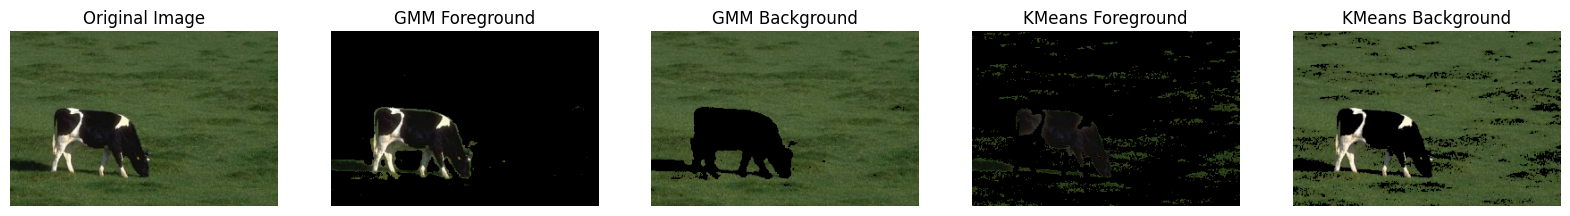

In [ ]:
img = cv2.imread('data/cow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB

pixels = img_rgb.reshape(-1, 3)

# --- GMM ---
gmm = GMM(n_components=2, random_state=0)
gmm.fit(pixels)
gmm_labels = gmm.predict(pixels)
gmm_counts = Counter(gmm_labels)
gmm_fg_label = min(gmm_counts, key=gmm_counts.get)
gmm_mask = (gmm_labels == gmm_fg_label).astype(np.uint8).reshape(img.shape[:2])
gmm_bg_mask = 1 - gmm_mask

gmm_foreground = img_rgb.copy()
gmm_foreground[gmm_mask == 0] = [0, 0, 0]

gmm_background = img_rgb.copy()
gmm_background[gmm_bg_mask == 0] = [0, 0, 0]

# --- KMeans ---
kmeans = KMeans_(n_clusters=2, random_state=0)
kmeans.fit (pixels)
kmeans_labels = kmeans.predict(pixels)
kmeans_counts = Counter(kmeans_labels)
kmeans_fg_label = min(kmeans_counts, key=kmeans_counts.get)
kmeans_mask = (kmeans_labels == kmeans_fg_label).astype(np.uint8).reshape(img.shape[:2])
kmeans_bg_mask = 1 - kmeans_mask

kmeans_foreground = img_rgb.copy()
kmeans_foreground[kmeans_mask == 0] = [0, 0, 0]

kmeans_background = img_rgb.copy()
kmeans_background[kmeans_bg_mask == 0] = [0, 0, 0]

plt.figure(figsize=(20,8))

plt.subplot(1,5,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(gmm_foreground)
plt.title('GMM Foreground')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(gmm_background)
plt.title('GMM Background')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(kmeans_foreground)
plt.title('KMeans Foreground')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(kmeans_background)
plt.title('KMeans Background')
plt.axis('off')

plt.show()


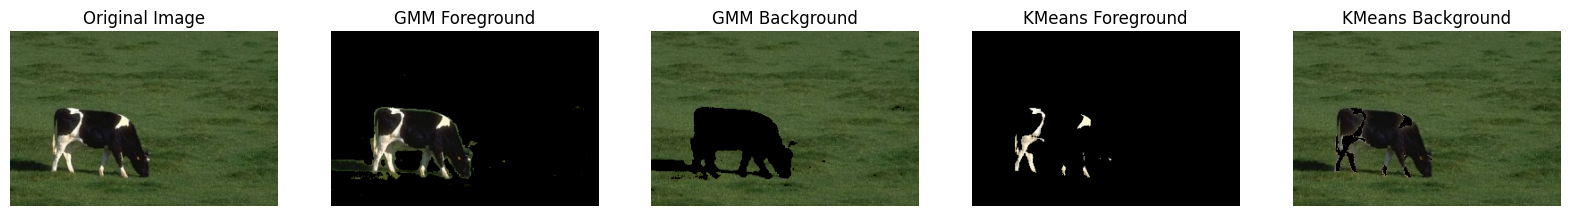

In [ ]:
img = cv2.imread('data/cow.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB

pixels = img_rgb.reshape(-1, 3)

# --- GMM ---
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(pixels)
gmm_labels = gmm.predict(pixels)
gmm_counts = Counter(gmm_labels)
gmm_fg_label = min(gmm_counts, key=gmm_counts.get)
gmm_mask = (gmm_labels == gmm_fg_label).astype(np.uint8).reshape(img.shape[:2])
gmm_bg_mask = 1 - gmm_mask

gmm_foreground = img_rgb.copy()
gmm_foreground[gmm_mask == 0] = [0, 0, 0]

gmm_background = img_rgb.copy()
gmm_background[gmm_bg_mask == 0] = [0, 0, 0]

# --- KMeans ---
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(pixels)
kmeans_counts = Counter(kmeans_labels)
kmeans_fg_label = min(kmeans_counts, key=kmeans_counts.get)
kmeans_mask = (kmeans_labels == kmeans_fg_label).astype(np.uint8).reshape(img.shape[:2])
kmeans_bg_mask = 1 - kmeans_mask

kmeans_foreground = img_rgb.copy()
kmeans_foreground[kmeans_mask == 0] = [0, 0, 0]

kmeans_background = img_rgb.copy()
kmeans_background[kmeans_bg_mask == 0] = [0, 0, 0]

plt.figure(figsize=(20,8))

plt.subplot(1,5,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(gmm_foreground)
plt.title('GMM Foreground')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(gmm_background)
plt.title('GMM Background')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(kmeans_foreground)
plt.title('KMeans Foreground')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(kmeans_background)
plt.title('KMeans Background')
plt.axis('off')

plt.show()


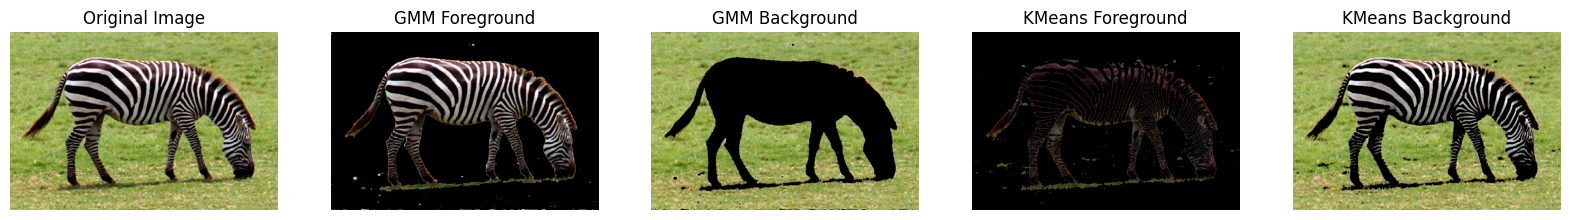

In [ ]:
img = cv2.imread('data/zebra.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Chuyển sang RGB

pixels = img_rgb.reshape(-1, 3)

# --- GMM ---
gmm = GaussianMixture(n_components=2, random_state=0)
gmm.fit(pixels)
gmm_labels = gmm.predict(pixels)
gmm_counts = Counter(gmm_labels)
gmm_fg_label = min(gmm_counts, key=gmm_counts.get)
gmm_mask = (gmm_labels == gmm_fg_label).astype(np.uint8).reshape(img.shape[:2])
gmm_bg_mask = 1 - gmm_mask

gmm_foreground = img_rgb.copy()
gmm_foreground[gmm_mask == 0] = [0, 0, 0]

gmm_background = img_rgb.copy()
gmm_background[gmm_bg_mask == 0] = [0, 0, 0]

# --- KMeans ---
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_labels = kmeans.fit_predict(pixels)
kmeans_counts = Counter(kmeans_labels)
kmeans_fg_label = min(kmeans_counts, key=kmeans_counts.get)
kmeans_mask = (kmeans_labels == kmeans_fg_label).astype(np.uint8).reshape(img.shape[:2])
kmeans_bg_mask = 1 - kmeans_mask

kmeans_foreground = img_rgb.copy()
kmeans_foreground[kmeans_mask == 0] = [0, 0, 0]

kmeans_background = img_rgb.copy()
kmeans_background[kmeans_bg_mask == 0] = [0, 0, 0]

plt.figure(figsize=(20,8))

plt.subplot(1,5,1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,5,2)
plt.imshow(gmm_foreground)
plt.title('GMM Foreground')
plt.axis('off')

plt.subplot(1,5,3)
plt.imshow(gmm_background)
plt.title('GMM Background')
plt.axis('off')

plt.subplot(1,5,4)
plt.imshow(kmeans_foreground)
plt.title('KMeans Foreground')
plt.axis('off')

plt.subplot(1,5,5)
plt.imshow(kmeans_background)
plt.title('KMeans Background')
plt.axis('off')

plt.show()
